# matplotlib

- 파이썬 표준 시각화 도구
- 2d 평면 그래프에 관한 다양한 포맷과 기능을 지원
- 객체지향 프로그래밍을 지원하여 그래프 요소를 세세하게 꾸밀 수 있음
- 비교적 사용법을 익히기 쉬움

# 선 그래프 (line plot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_excel("./data/시도별_전출입_인구수.xlsx")
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


- 엑셀 파일에서 병합된 셀을 데이터프레임에서 변환할 때 적절한 값을 찾지 못해 전출지별 열에 결측치 발생
    - 누락 데이터 앞 행의 데이터로 채워야 함

In [4]:
df = df.fillna(method = "ffill")

In [5]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,제주특별자치도,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [11]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
df_seoul = df[(df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")]
df_seoul = df_seoul.drop(["전출지별"], axis = 1)
df_seoul.rename({"전입지별" : "전입지"}, axis = 1, inplace = True)
df_seoul.set_index("전입지", inplace = True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [12]:
# 서울에서 경기도로 이동한 데이터만 선택
sr_gy = df_seoul.loc["경기도"]

In [13]:
sr_gy.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

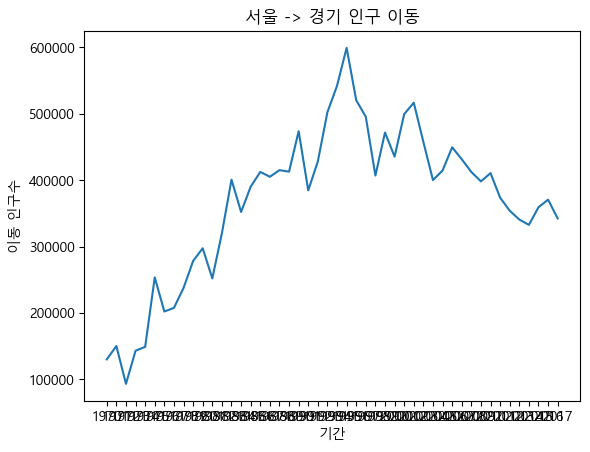

In [14]:
# 시리즈의 인덱스를 x축, 값을 y축으로 선 그래프 그리기
plt.plot(sr_gy)
plt.title("서울 -> 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")
plt.show()

## 그래프 꾸미기

- 눈금 레이블이 들어갈 충분한 여유공간이 없으면 글씨가 겹치는 문제가 발생
- 문제 해결을 위한 방법
    - figure()로 공간을 만들기 위해 그래프의 가로 사이즈를 더 크게 설정
    - xticks()로 x축 눈금 레이블을 90도 회전시켜서 글씨가 겹치지 않게 하기

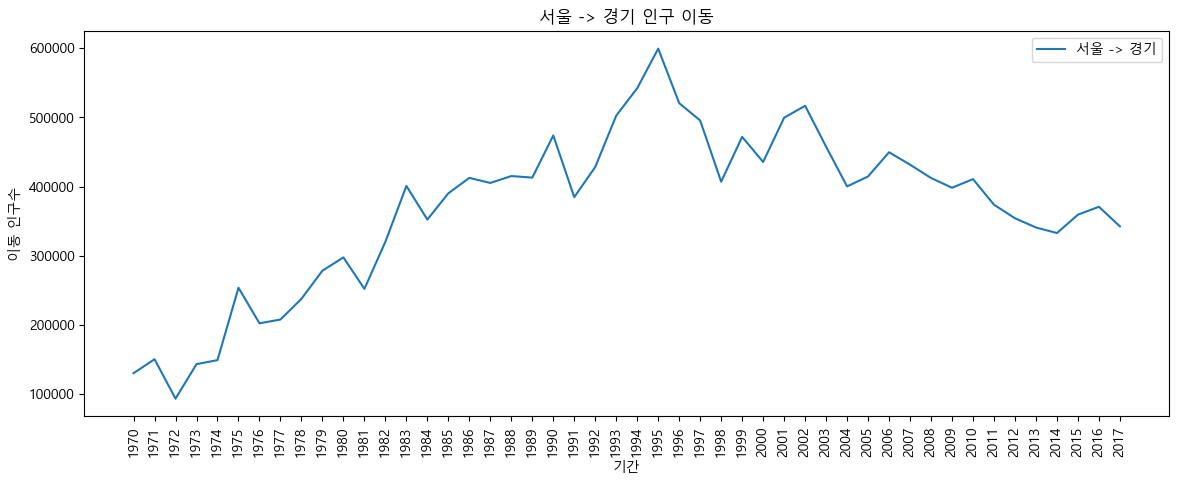

In [17]:
plt.figure(figsize = (14, 5))
plt.xticks(rotation = "vertical")
plt.plot(sr_gy)
plt.title("서울 -> 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")

# 범례 표시
plt.legend(labels = ["서울 -> 경기"])
plt.show()

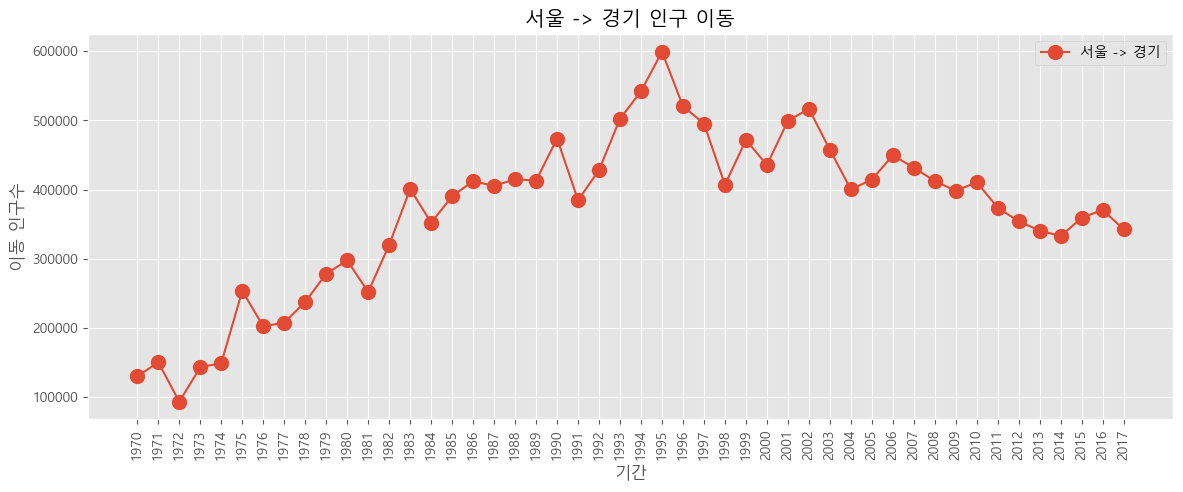

In [21]:
# 스타일 서식 지정
plt.style.use("ggplot")

plt.figure(figsize = (14, 5))
plt.xticks(rotation = "vertical")
plt.plot(sr_gy, marker = "o", markersize = 10)
plt.title("서울 -> 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")

# 범례 표시
plt.legend(labels = ["서울 -> 경기"])
plt.show()

C:\Users\ITSC\AppData\Local\Temp\ipykernel_8240\3130867593.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_gy.index, rotation = 75)


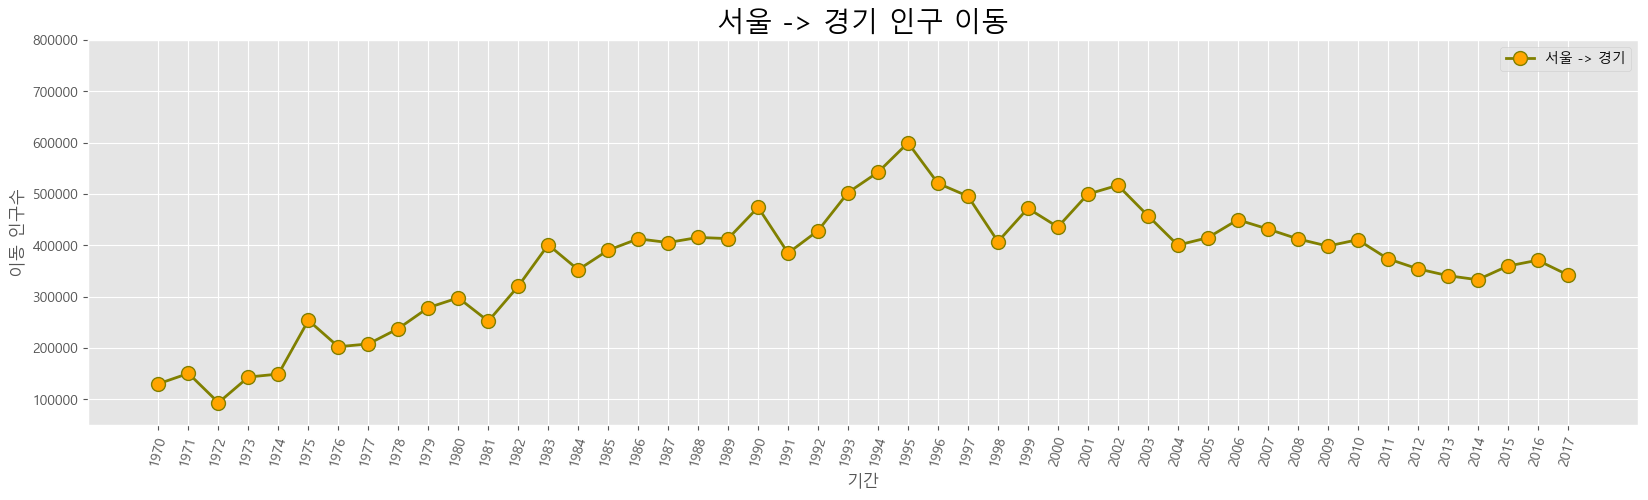

In [74]:
# 그래프 객체 생성 (figure에 1개의 서브플롯을 생성)
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_gy, marker = "o", markersize = 10, markerfacecolor = "orange",
        color = "olive", linewidth = 2, label = "서울 -> 경기")
ax.legend()

# y축 범위 지정 (최솟값, 최댓값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title("서울 -> 경기 인구 이동", size = 20)

# 축 이름 추가
ax.set_xlabel("기간", size = 12)
ax.set_ylabel("이동 인구수", size = 12)

# 축 눈금 레이블 지정 및 75도 회전
ax.set_xticklabels(sr_gy.index, rotation = 75)

# 축 눈금 레이블 크기
ax.tick_params(axis = "both", labelsize = 10)

plt.show()

In [25]:
# 서울에서 충청남도, 경상북도, 강원도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))

In [26]:
df_seoul.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [28]:
df_3 = df_seoul.loc[["충청남도", "경상북도", "강원도"], col_years]

In [29]:
df_3.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


C:\Users\ITSC\AppData\Local\Temp\ipykernel_8240\819328690.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_gy.index, rotation = 75)


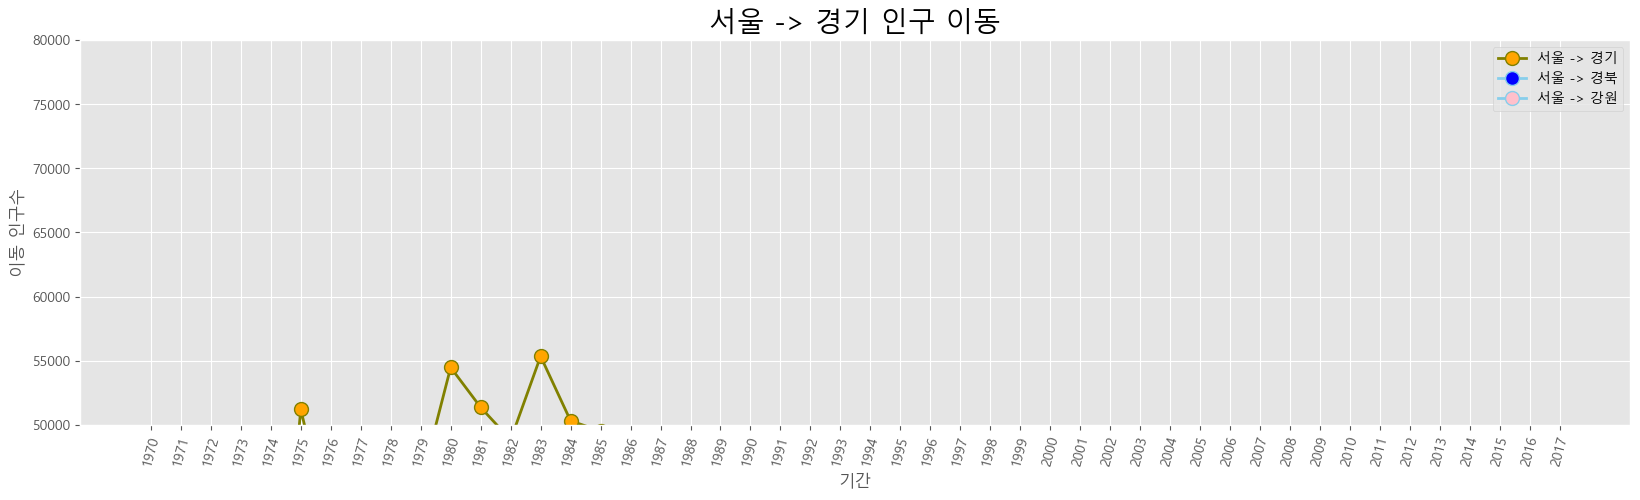

In [31]:
# 스타일 서식 지정
fig = plt.figure(figsize = (20 , 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc["충청남도"], marker = "o", markerfacecolor = "orange", markersize = 10, color = "olive", linewidth = 2, label = "서울 -> 경기")
ax.plot(col_years, df_3.loc["경상북도"], marker = "o", markerfacecolor = "blue", markersize = 10, color = "skyblue", linewidth = 2, label = "서울 -> 경북")
ax.plot(col_years, df_3.loc["강원도"], marker = "o", markerfacecolor = "pink", markersize = 10, color = "skyblue", linewidth = 2, label = "서울 -> 강원")

ax.legend()

# y축 범위 지정 (최솟값, 최댓값)
ax.set_ylim(50000, 80000)

# 차트 제목 추가
ax.set_title("서울 -> 경기 인구 이동", size = 20)

# 축 이름 추가
ax.set_xlabel("기간", size = 12)
ax.set_ylabel("이동 인구수", size = 12)

# 축 눈금 레이블 지정 및 75도 회전
ax.set_xticklabels(sr_gy.index, rotation = 75)

# 축 눈금 레이블 크기
ax.tick_params(axis = "both", labelsize = 10)

plt.show()

- 지리적으로 가까운 충남지역으로 이동한 인구가 다른 두 지역에 비해 많은 편
- 70~ 80년대에는 서울에서 지방으로 전출하는 인구가 많았으나 90년 이후로는 감소하는 패턴을 보임

## 면적 그래프(area plot)

- 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀짐

In [35]:
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years].T
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


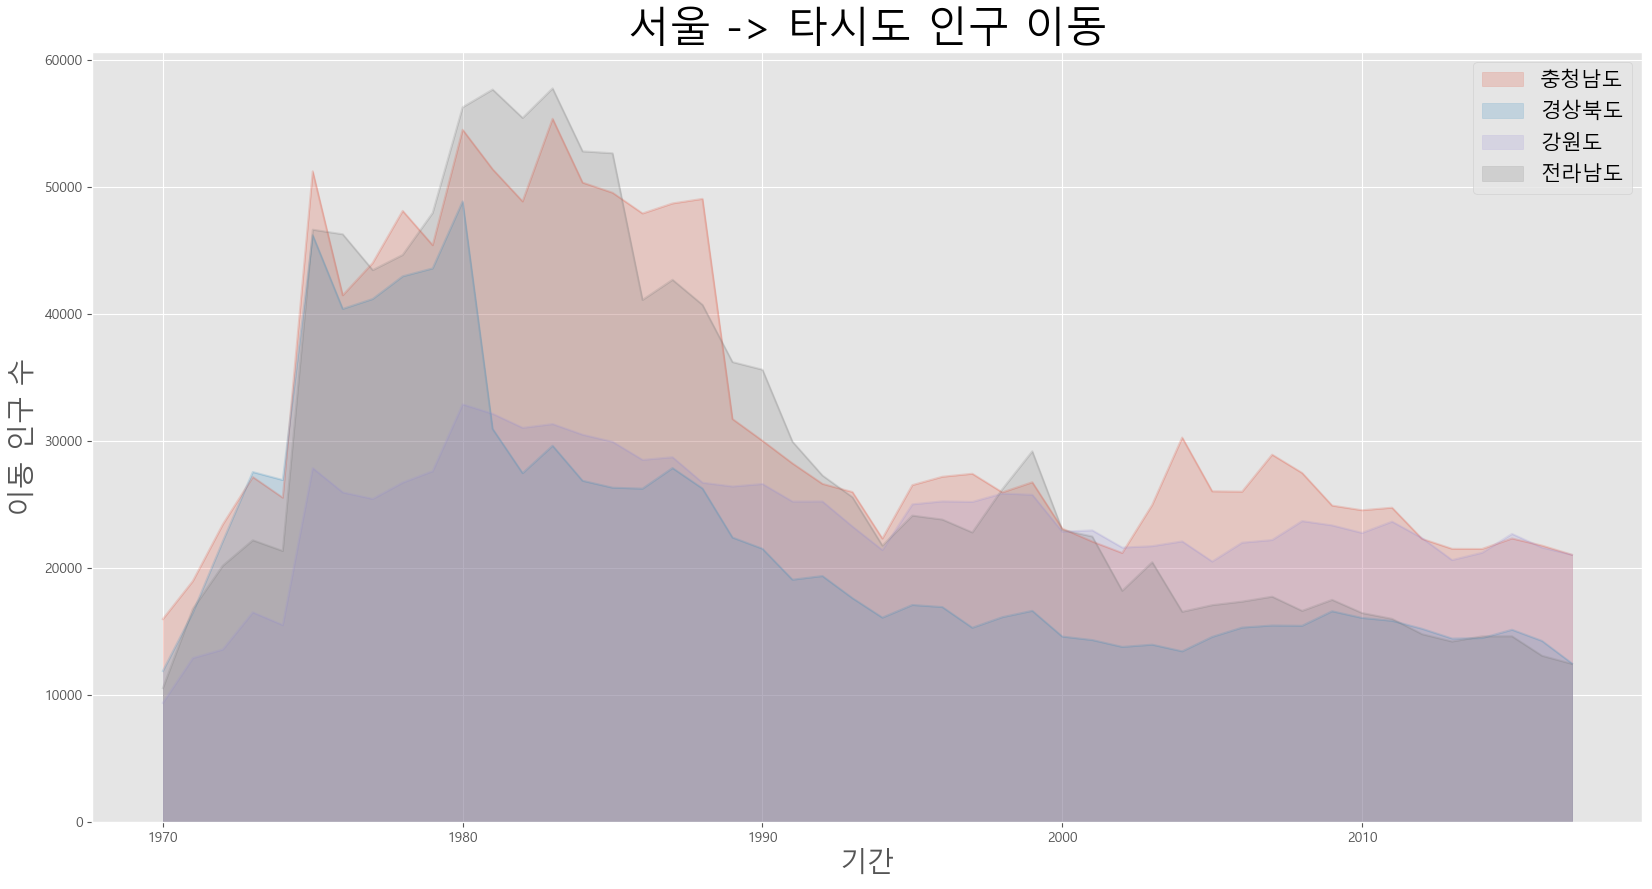

In [36]:
# 면적 그래프 그리기
df_4.plot(kind = "area", stacked = False, alpha = 0.2, figsize = (20, 10))

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.ylabel("이동 인구 수", size = 20)
plt.xlabel("기간", size = 20)
plt.legend(fontsize = 15)

plt.show()

## 막대 그래프(bar plot)

- 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
- 막대 높이의 상대적 길이 차이를 통해 값의 크고 작음을 설명
- 세로형과 가로형 막대 그래프 두 종류가 있음
    - 다만 세로형은 선 그래프와 정보 제공 측면에서 큰 차이가 없음

In [38]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]
df_4 = df_4.transpose()
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591


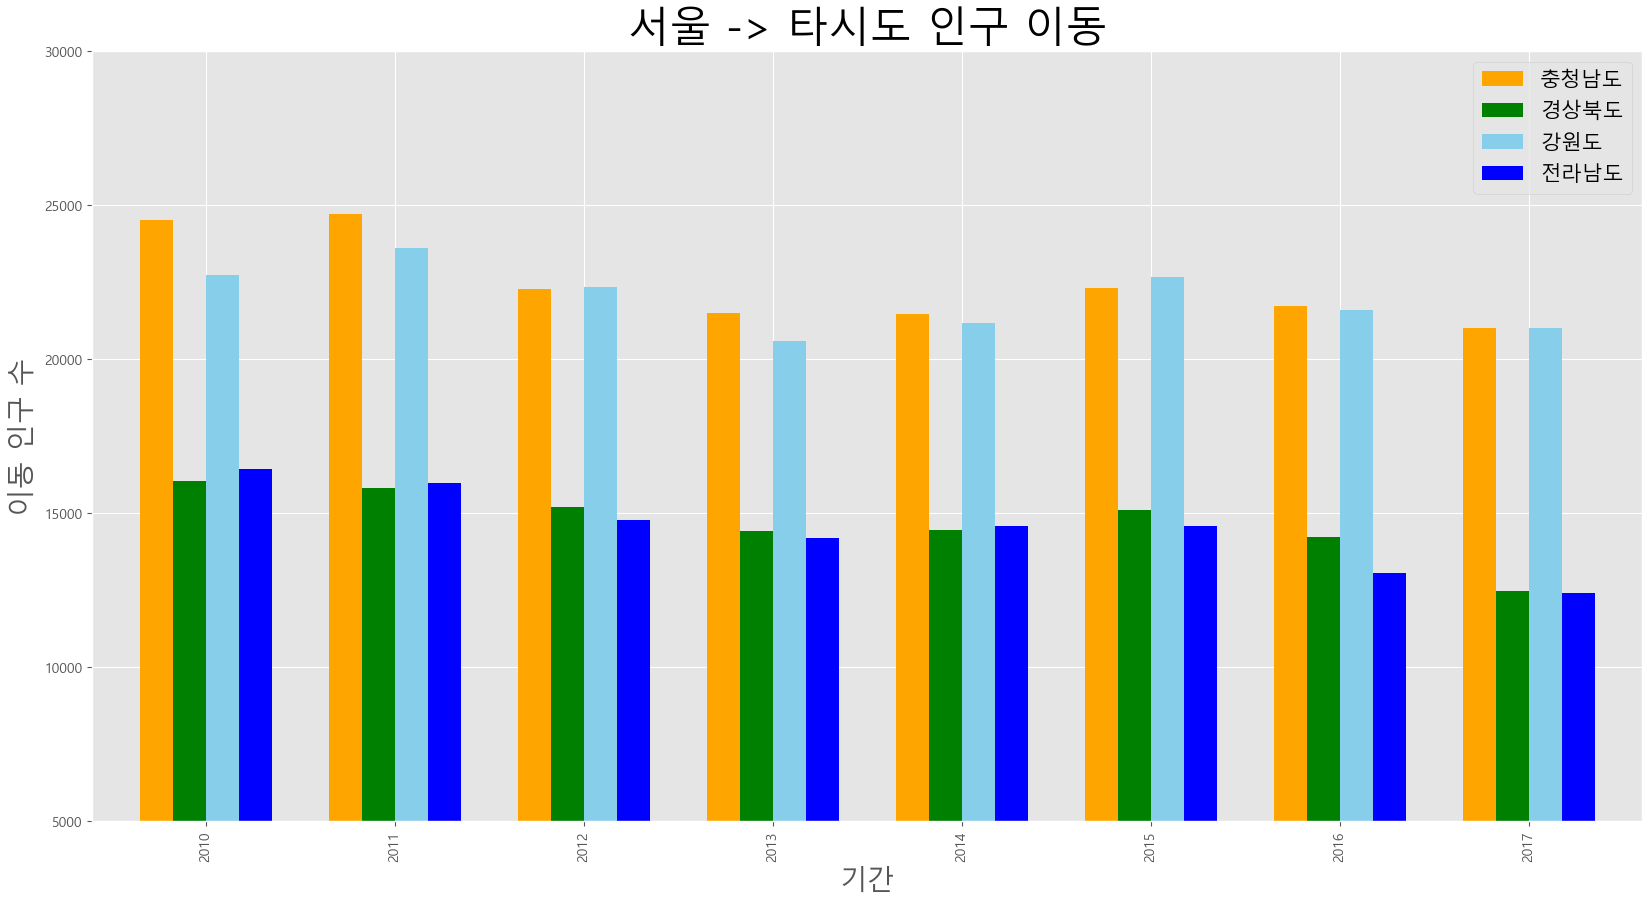

In [40]:
# 막대 그래프 그리기
df_4.plot(kind = "bar", figsize = (20, 10), width = 0.7, color = ["orange", "green", "skyblue", "blue"])

plt.title("서울 -> 타시도 인구 이동", size = 30)
plt.ylabel("이동 인구 수", size = 20)
plt.xlabel("기간", size = 20)
plt.legend(fontsize = 15)
plt.ylim(5000, 30000)

plt.show()

In [42]:
df_4 = df_4.transpose()
df_4.head()

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [43]:
# 2010 - 2017년 이도 ㅇ인구 수를 합계하여 새로운 열로 추가
df_4["합계"] = df_4.sum(axis = 1)

In [44]:
df_4.head()

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035


In [49]:
# 가장 큰 값부터 정렬
df_total = df_4[["합계"]].sort_values(by = "합계", ascending = True)

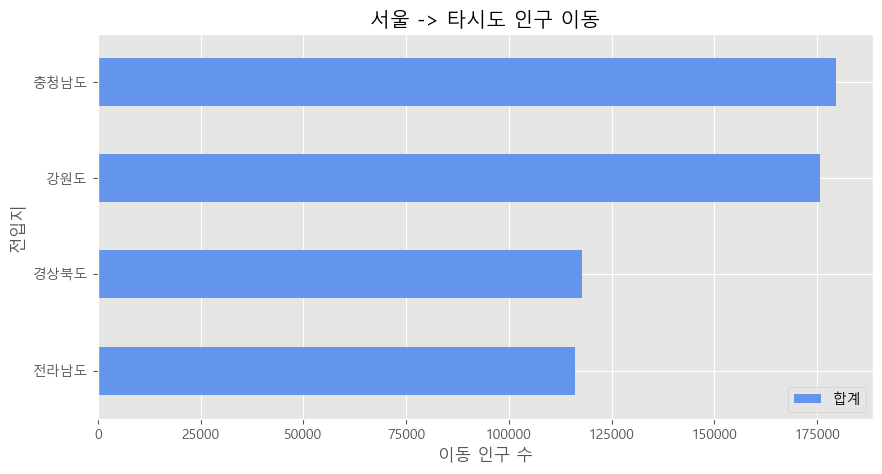

In [50]:
# 수평 막대 그래프 그리기
df_total.plot(kind = "barh", color = "cornflowerblue", width = 0.5, figsize = (10, 5))

plt.title("서울 -> 타시도 인구 이동")
plt.ylabel("전입지")
plt.xlabel("이동 인구 수")

plt.show()

- 2010 ~ 2017년에 서울에서 충청남도로 이동한 사람이 제일 많고 다음으로 강원도, 경상북도, 전라남도 순임

### 보조 축 활용

- 보조 축을 추가하여 2개의 y축을 갖는 그래프 그리기

In [52]:
df = pd.read_excel(r"C:/Users/ITSC/Desktop/ChrisProject/06. Pandas/data/남북한발전전력량.xlsx")
df.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [54]:
df = df.loc[5:9]
df.drop("전력량 (억㎾h)", axis = 1, inplace = True)

In [56]:
df.set_index("발전 전력별", inplace = True)

In [58]:
df = df.T

In [61]:
df = df.rename(columns = {"합계" : "총발전량"})

In [62]:
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [65]:
df["직전해 총 발전량"] = df["총발전량"].shift(1)

In [67]:
# 증감률(변동률) 계산
df["증감률"] = ((df["총발전량"] / df["직전해 총 발전량"]) - 1) * 100

In [68]:
df.head()

발전 전력별,총발전량,수력,화력,원자력,직전해 총 발전량,증감률
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


In [72]:
plt.rcParams['axes.unicode_minus'] = False

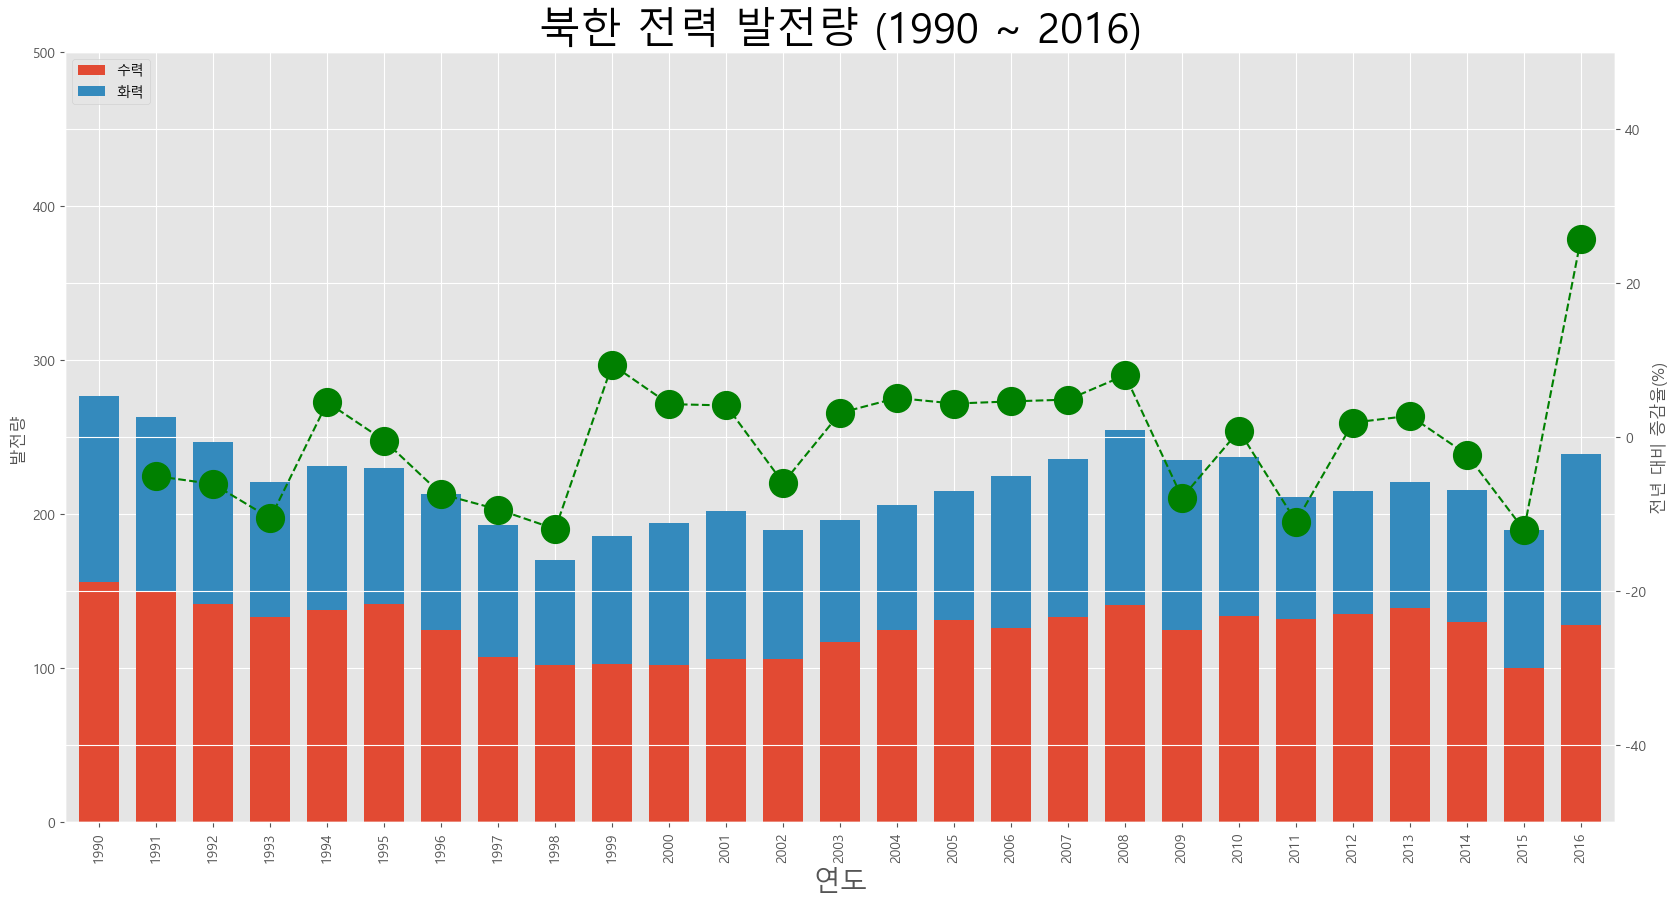

In [73]:
# 2축 그래프 그리기
ax1 = df[["수력", "화력"]].plot(kind = "bar", figsize = (20, 10), width = 0.7, stacked = True)
ax2 = ax1.twinx() # 원래 주어진 axis, x를 공유하는 쌍둥이 axis
ax2.plot(df.index, df["증감률"], ls = ("--"), marker = "o", markersize = 20, color = "green", label = "전년대비 증감율(%)")

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel("연도", size = 20)
ax1.set_ylabel("발전량")
ax2.set_ylabel("전년 대비 증감율(%)")

plt.title("북한 전력 발전량 (1990 ~ 2016)", size = 30)
ax1.legend(loc = "upper left")

plt.show()

## 히스토그램(histogram)

- 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현

In [3]:
df = pd.read_csv("./data/auto-mpg.csv", header = None)
df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"]

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [12]:
plt.style.use("classic")

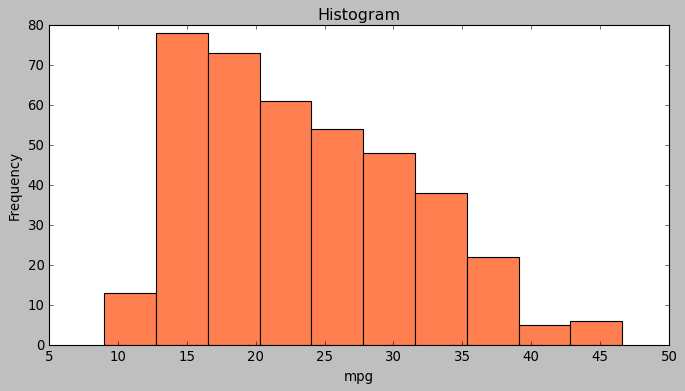

In [6]:
# 연비(mpg)에 대한 히스토그램 그리기
df["mpg"].plot(kind = "hist", bins = 10, color = "coral", figsize = (10, 5))

plt.title("Histogram")
plt.xlabel("mpg")
plt.show()

## 산점도(scatter plot)

- 서로 다른 두 변수 사이의 관계를 나타냄
    - 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고 데이터값이 위치하는 좌표를 찾아 점으로 표시
- 두 연속 변수의 관계를 보여주는 점에서 선 그래프와 유사
    - 선 그래프를 그릴 때 "o" 옵션 등으로 선 없이 점으로만 표시하면 사실상 산점도라고 볼 수 있음

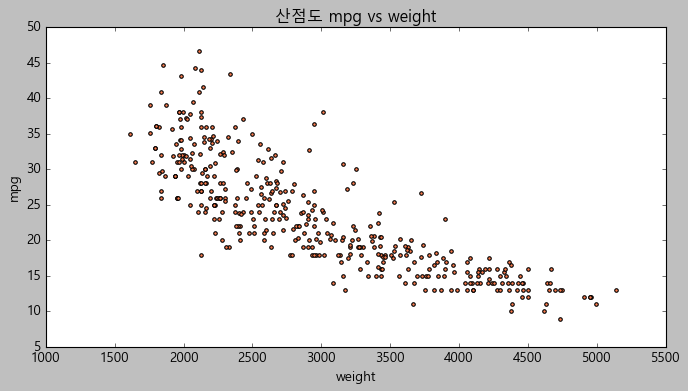

In [8]:
# 연비(mpg)와 차중(weight)열에 대한 산점도
df.plot(kind = "scatter", x = "weight", y = "mpg", c = "coral", s = 10, figsize = (10,5))
plt.title("산점도 mpg vs weight")
plt.show()


- cylinders 변수를 점의 크기로 표현하여 추가
    - 데이터 값으 그대로 쓰면 점의 크기 변화량이 너무 크기 때문에 0 ~ 1 범위의 실수 값으로 정규화

In [9]:
# cylinders의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df["cylinders"] / df["cylinders"].max() * 200

In [10]:
cylinders_size.head()

0    200.0
1    200.0
2    200.0
3    200.0
4    200.0
Name: cylinders, dtype: float64

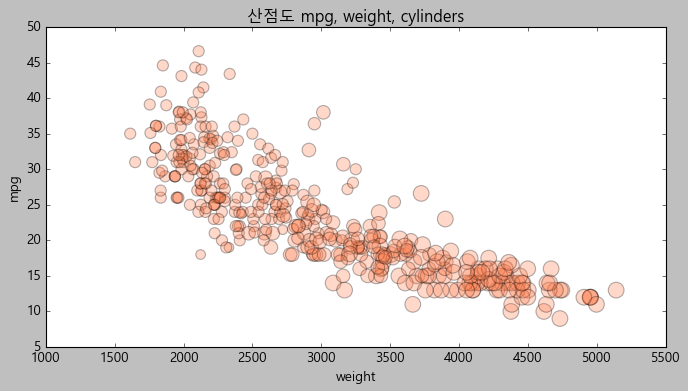

In [15]:
# 3개의 변수로 산점도 그리기
df.plot(kind = "scatter", x = "weight", y = "mpg", c = "coral", s = cylinders_size, figsize = (10, 5), alpha = 0.3)
plt.title("산점도 mpg, weight, cylinders")
plt.show()

### 그래프를 png파일로 저장

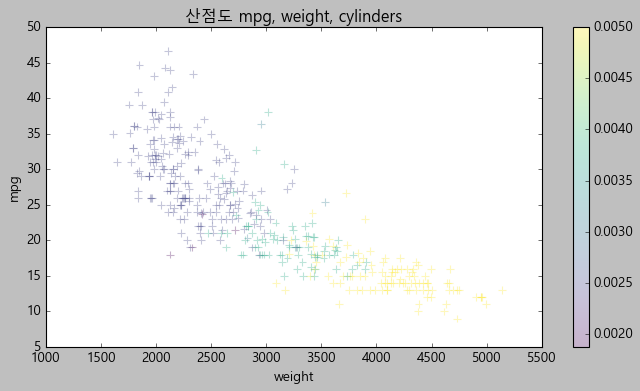

In [18]:
cylinders_size /= 200

# 3개의 변수로 산점도 그리기
df.plot(kind = "scatter", x = "weight", y = "mpg", c = cylinders_size, s = 50, figsize = (10, 5), alpha = 0.3, marker = "+", cmap = "viridis")
plt.title("산점도 mpg, weight, cylinders")

# 위의 그래프를 이미지 파일로 저장, 배경이 투명한 이미지 파일로 저장
plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent = True)

plt.show()

## 파이 차트(pie chart)

- 원을 파이 조각처럼 나누어서 표현
- 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례

In [20]:
# origin을 기준으로 그룹화
df_origin = df.groupby("origin").size()
df_origin

origin
1    249
2     70
3     79
dtype: int64

In [21]:
# 제조국가 값을 실제 지역명으로 변경
df_origin.index = ["USA", "EU", "JPN"]
df_origin

USA    249
EU      70
JPN     79
dtype: int64

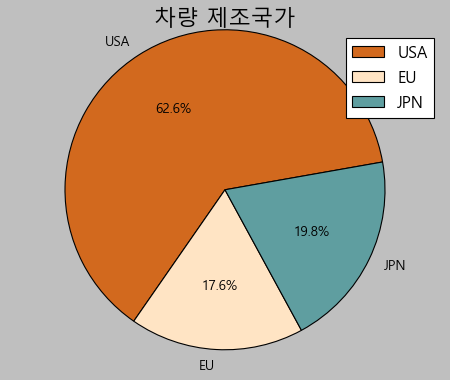

In [22]:
df_origin.plot(kind = "pie", figsize = (7, 5), autopct = "%.1f%%", startangle = 10, colors = ["chocolate", "bisque", "cadetblue"])
plt.title("차량 제조국가", size = 20)
plt.axis("equal")
plt.legend(labels = df_origin.index, loc = "upper right")
plt.show()

## box plot

- 범주형 데이터의 분포를 파악하기에 적합

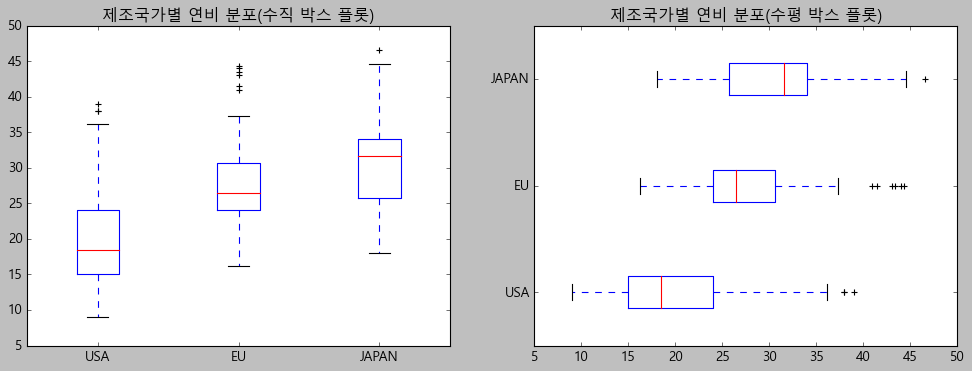

In [23]:
# 그래프 객체 생성 (figure에 2개의 서브플롯을 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x = [df[df["origin"] == 1]["mpg"],
                 df[df["origin"] == 2]["mpg"],
                 df[df["origin"] == 3]["mpg"]],
            labels = ["USA", "EU", "JAPAN"])

ax2.boxplot(x = [df[df["origin"] == 1]["mpg"],
                df[df["origin"] == 2]["mpg"],
                df[df["origin"] == 3]["mpg"]],
           labels = ["USA", "EU", "JAPAN"],
           vert = False)

ax1.set_title("제조국가별 연비 분포(수직 박스 플롯)")
ax2.set_title("제조국가별 연비 분포(수평 박스 플롯)")
plt.show()